<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P8_01_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle *Spaceship Titanic*

https://www.kaggle.com/competitions/spaceship-titanic/data

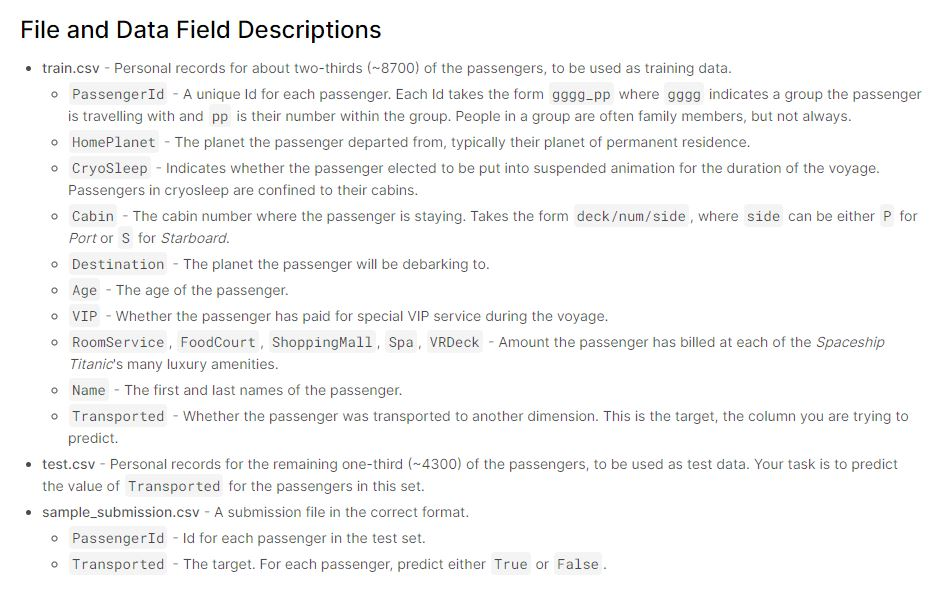

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 8

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 8


Importation des librairies nécessaires au projet

In [3]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import functions
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import random
import numpy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from torchsummary import summary
LE = LabelEncoder()
OHE = OneHotEncoder()
import os

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

Importation des données

In [ ]:
df_train = pad.read_csv('train.csv')
df_test = pad.read_csv('test.csv')

# Exploration rapide des données

In [ ]:
print("Constitution de la df train : " + str(df_train.shape))
print("Constitution de la df test : " + str(df_test.shape))

Constitution de la df train : (8693, 14)
Constitution de la df test : (4277, 13)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black", sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow"] 
sns.set_palette(custom_palette) 
color = sns.color_palette()

In [ ]:
categorical_features = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "Name", "Transported", "VIP"]
quantitative_features = df_train.drop(categorical_features, axis = 1).columns.tolist()

In [ ]:
df_categorical_features = df_train[["HomePlanet", "CryoSleep", "Cabin", "Destination", "Name", "Transported", "VIP"]]
df_quantitative_features = df_train.drop(categorical_features, axis = 1)

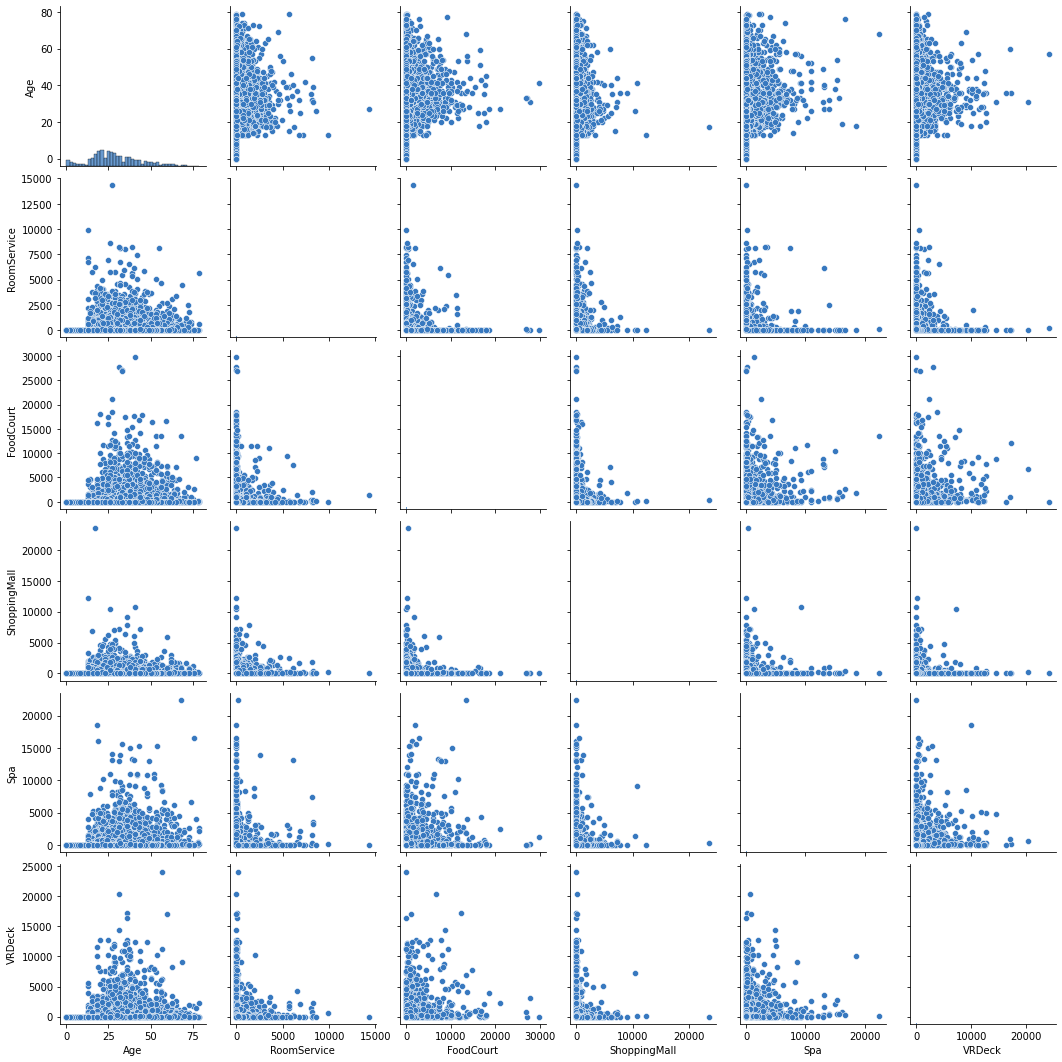

In [ ]:
sns.pairplot(df_quantitative_features)

## Nettoyage des données

In [ ]:
quantitative_features

['PassengerId',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

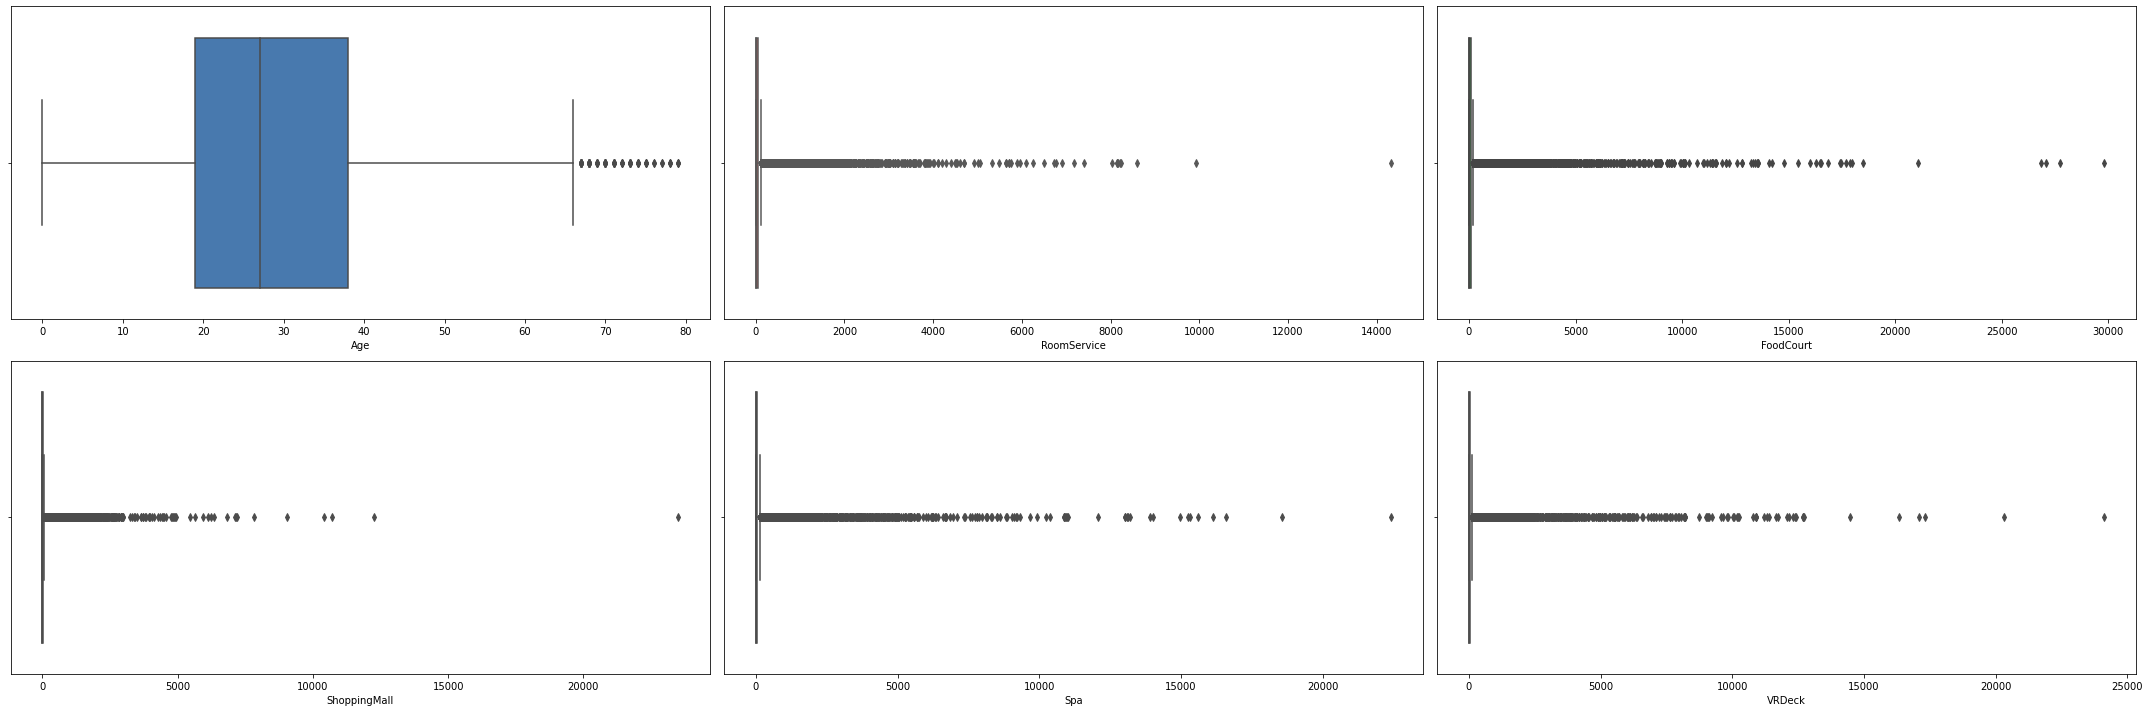

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))


sns.boxplot(data=df_train, x="Age", ax=axs[0, 0], color = custom_palette[0])
sns.boxplot(data=df_train, x="RoomService", ax=axs[0, 1], color = custom_palette[1])
sns.boxplot(data=df_train, x="FoodCourt", ax=axs[0, 2], color = custom_palette[2])
sns.boxplot(data=df_train, x="ShoppingMall", ax=axs[1, 0], color = custom_palette[3])
sns.boxplot(data=df_train, x="Spa", ax=axs[1, 1], color = custom_palette[4])
sns.boxplot(data=df_train, x="VRDeck", ax=axs[1, 2], color = custom_palette[4])

plt.tight_layout()
#fig.savefig("Global_exploration_quantitative_variables_boxplot", dpi=400)
plt.show()

In [ ]:
df_quantitative_features.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_train[df_quantitative_features["RoomService"] == 14327]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False


Il a beaucoup abusé du roomservice celui-là, est-ce possible ? vous avez une idée ? J'aurais bien envie de l'enlever

In [ ]:
df_train[df_quantitative_features["FoodCourt"] == 29813]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2067,2215_01,Europa,False,A/27/S,55 Cancri e,41.0,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True


Il a beaucoup mangé celui-là, est-ce possible ? vous avez une idée ? J'aurais bien envie de l'enlever

In [ ]:
df_train[df_quantitative_features["ShoppingMall"] == 23492]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8415,8989_01,Europa,False,B/291/P,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,356.0,3.0,NaN,True


Histogramme de distribution pour voir notamment si besoin de normalisation (log ?)

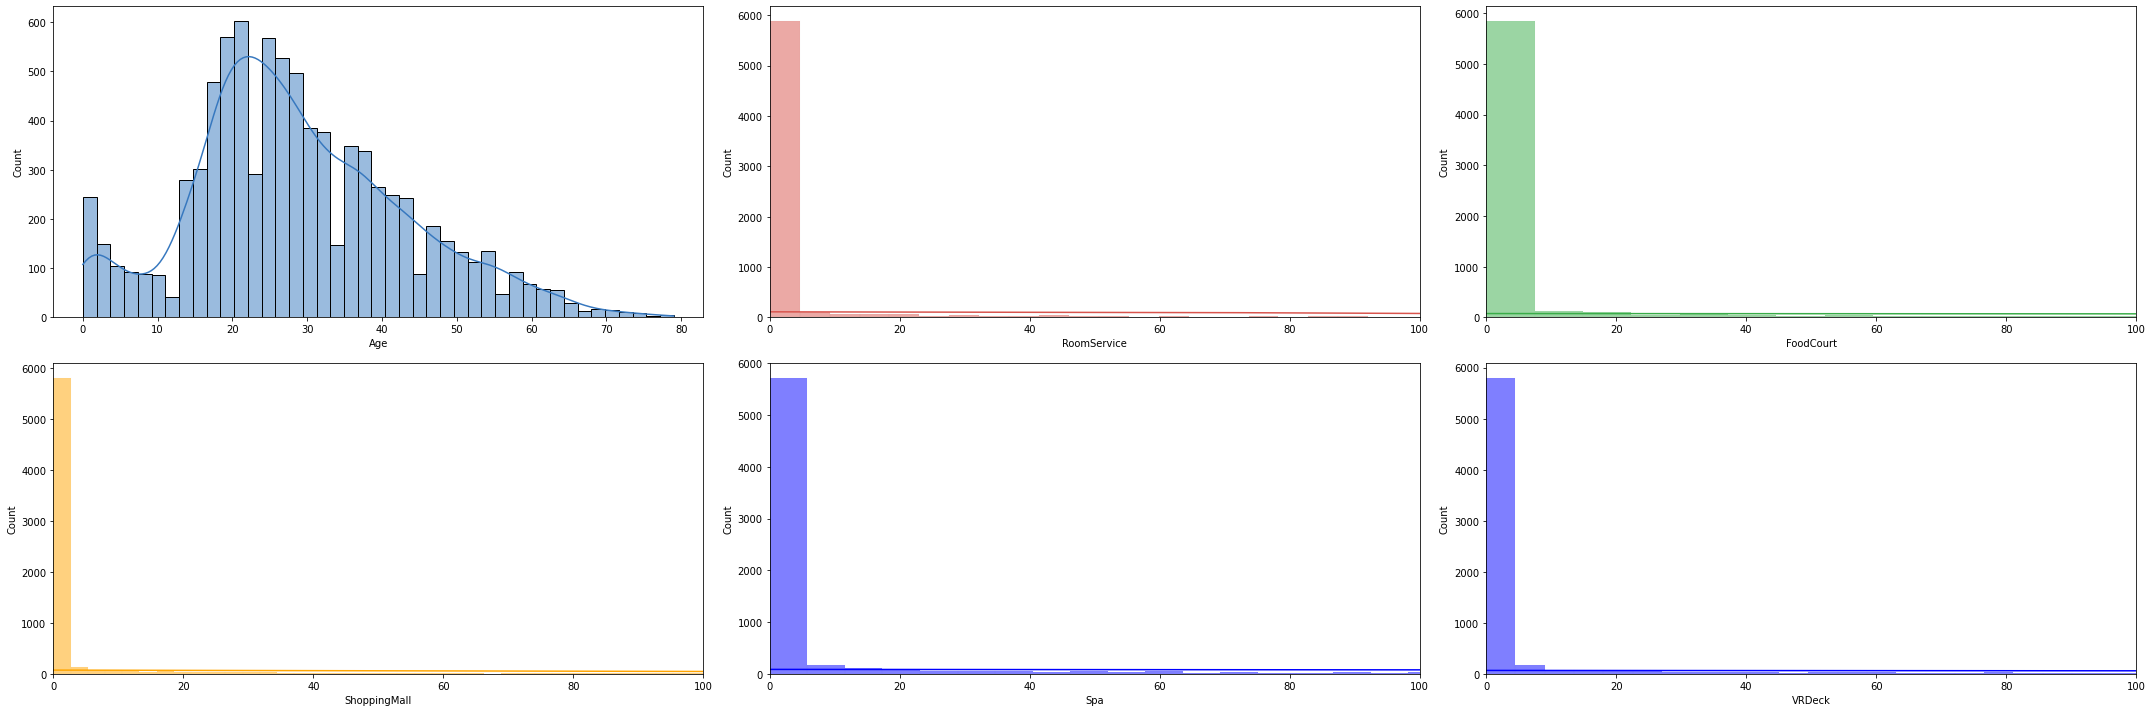

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))


sns.histplot(data=df_train, x="Age", kde=True,ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df_train, x="RoomService", kde=True,ax=axs[0, 1], color = custom_palette[1]).set_xlim(0,100)
sns.histplot(data=df_train, x="FoodCourt", kde=True,ax=axs[0, 2], color = custom_palette[2]).set_xlim(0,100)
sns.histplot(data=df_train, x="ShoppingMall",kde=True, ax=axs[1, 0], color = custom_palette[3]).set_xlim(0,100)
sns.histplot(data=df_train, x="Spa", kde=True,ax=axs[1, 1], color = custom_palette[4]).set_xlim(0,100)
sns.histplot(data=df_train, x="VRDeck", kde=True,ax=axs[1, 2], color = custom_palette[4]).set_xlim(0,100)

plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables_histplot", dpi=400)
plt.show()

Il y a énormement de personne en cryosleep qui n'ont rien consommé d'où l'écrasement de l'histo sur 0

# Feature engineering

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


L'info *cabin* renferme l'information de l'étage, du n° de cabin et du côté du vaisseau, on peut imaginer que la première info et la dernière soit discriminant sur le succès de transport ou non des passagers, je propose donc de créer une variable *deck* et une variable *side*

In [ ]:
def get_side(df):
    side = df[-1:]
    return side

In [ ]:
df_train["Side"] = df_train["Cabin"].dropna().apply(get_side)

In [ ]:
def get_deck(df):
    deck = df[:1]
    return deck

In [ ]:
df_train["Deck"] = df_train["Cabin"].dropna().apply(get_deck)

Si le n° de cabin correspond à l'avant ou l'arrière du vaisseau, ce n° peut aussi être important pour la survie, je vais donc l'extraire

In [ ]:
def get_cabin_number(df):
    cab_num = df[2:-2]
    return cab_num

In [ ]:
df_train["Cabin_number"] = df_train["Cabin"].dropna().apply(get_cabin_number)

In [ ]:
df_train["Cabin_number"] = df_train["Cabin_number"].astype('float64')

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,Deck,Cabin_number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,A,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,P,A,98.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,S,G,1499.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,S,G,1500.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,S,E,608.0


La colonne Cabin n'est donc plus importante pour le modèle, je la supprime

In [ ]:
df_train = df_train.drop("Cabin", axis = 1)

La variable *name* ne devrait pas changer grand chose logiquement, on éjecte du modèle

In [ ]:
df_train = df_train.drop("Name", axis = 1)

Je ne suis pas sûr que les variables des dépenses soient réellement importantes pour la prédiction de survie mais je vais créer une variable dépense totale qui sera peut être plus utile que 5 variables très corrélées entre elles

In [ ]:
df_train["Dépense_totale"] = df_train["RoomService"] + df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["VRDeck"]

J'applique la même chose pour la df test

In [ ]:
df_test["Side"] = df_test["Cabin"].dropna().apply(get_side)
df_test["Deck"] = df_test["Cabin"].dropna().apply(get_deck)
df_test["Cabin_number"] = df_test["Cabin"].dropna().apply(get_cabin_number)
df_test = df_test.drop("Cabin", axis = 1)
df_test = df_test.drop("Name", axis = 1)
df_test["Dépense_totale"] = df_test["RoomService"] + df_test["FoodCourt"] + df_test["ShoppingMall"] + df_test["Spa"] + df_test["VRDeck"]

Gestion des NaN

In [ ]:
df_train.loc[df_train['HomePlanet'].isna(), 'HomePlanet'] = "Europa"

In [ ]:
df_train.loc[df_train['Dépense_totale'] == 0, 'CryoSleep'] = True
df_train.loc[df_train['CryoSleep'].isna(), 'CryoSleep'] = False

In [ ]:
df_train.loc[df_train['Destination'].isna(), 'Destination'] = 'TRAPPIST-1e'

In [ ]:
df_train.loc[df_train['Age'].isna(), 'Age'] = df_train['Age'].mean()

In [ ]:
df_train.loc[df_train['VIP'].isna(), 'VIP'] = False

In [ ]:
df_train.loc[df_train['Side'].isna(), 'Side'] = random.choice(['P','S'])

In [ ]:
df_train.loc[df_train['Deck'].isna(), 'Deck'] = random.choice(['F','G'])

In [ ]:
df_train.loc[df_train['Cabin_number'].isna(), 'Cabin_number'] = random.choice(range(1, 1894))

In [ ]:
df_train['Dépense_totale'] = np.where((df_train['Dépense_totale'].isna()) & (df_train['CryoSleep'] == True), 0, df_train['Dépense_totale'])
df_train.loc[df_train['Dépense_totale'].isna(), 'Dépense_totale'] = df_train['Dépense_totale'].mean()

In [ ]:
#J'applique la même chose pour le dataset test
df_test.loc[df_test['HomePlanet'].isna(), 'HomePlanet'] = "Europa"
df_test.loc[df_test['Dépense_totale'] == 0, 'CryoSleep'] = True
df_test.loc[df_test['CryoSleep'].isna(), 'CryoSleep'] = False
df_test.loc[df_test['Destination'].isna(), 'Destination'] = 'TRAPPIST-1e'
df_test.loc[df_test['Age'].isna(), 'Age'] = df_test['Age'].mean()
df_test.loc[df_test['VIP'].isna(), 'VIP'] = False
df_test.loc[df_test['Side'].isna(), 'Side'] = random.choice(['P','S'])
df_test.loc[df_test['Deck'].isna(), 'Deck'] = random.choice(['F','G'])
df_test.loc[df_test['Cabin_number'].isna(), 'Cabin_number'] = random.choice(range(1, 1894))
df_test['Dépense_totale'] = np.where((df_test['Dépense_totale'].isna()) & (df_test['CryoSleep'] == True), 0, df_test['Dépense_totale'])
df_test.loc[df_test['Dépense_totale'].isna(), 'Dépense_totale'] = df_test['Dépense_totale'].mean()

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
0,0001_01,Europa,True,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,S,E,608.0,4637.0


# Analyse uni et multivariée pour comprendre le comportement des variables

In [ ]:
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')

In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_number,Dépense_totale
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,606.105142,1421.252213
std,14.339054,666.717663,1611.489240,604.696458,1136.705535,1145.717189,507.360544,2708.171944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,448.000000,758.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000,983.000000,1421.252213
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000,35987.000000


In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,True,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


In [ ]:
df_train.isna().sum() 

HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Transported         0
Side                0
Deck                0
Cabin_number        0
Dépense_totale      0
dtype: int64

Il y a beaucoup de NaN et les supprimer revient à supprimer 2000 lignes soit 25% du dataset, il va surement falloir faire du cas par cas (colonnes)

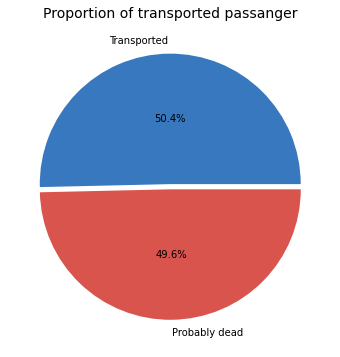

In [ ]:
data = df_train['Transported'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("Transported", "Probably dead")
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Proportion of transported passanger", fontsize=14);
pie.savefig("Proportion of transported passanger.png")

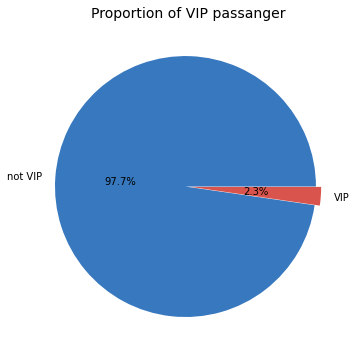

In [ ]:
data = df_train['VIP'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("not VIP", "VIP")
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Proportion of VIP passanger", fontsize=14);
pie.savefig("Proportion of VIP passanger.png")

Il y a t-il un impact VIP or not VIP sur la survie

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

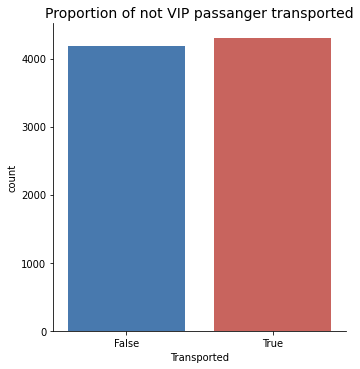

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['VIP']== False], kind='count')
plt.title("Proportion of not VIP passanger transported", fontsize=14);
#ax.savefig("Proportion of not VIP passanger transported", dpi=400)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

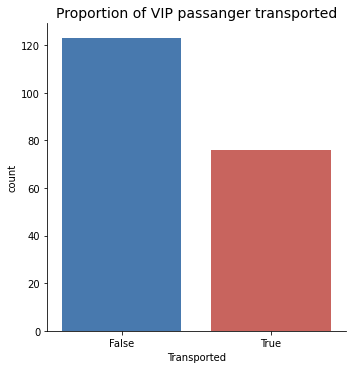

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['VIP']== True], kind='count')
plt.title("Proportion of VIP passanger transported", fontsize=14);
#ax.savefig("Proportion of VIP passanger transported", dpi=400)

La variable VIP ne va sûrement pas jouer un rôle important dans notre modélisation

In [ ]:
categorical_features = ["HomePlanet", "CryoSleep", "Destination", "Transported", "VIP", "Deck", "Side"]
quantitative_features = df_train.drop(categorical_features, axis = 1).columns.tolist()
df_categorical_features = df_train[["HomePlanet", "CryoSleep", "Destination", "Transported", "VIP", "Deck", "Side"]]
df_quantitative_features = df_train.drop(categorical_features, axis = 1).dropna()

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,True,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


Fonction permettant de tester la différence entre deux groupes

In [ ]:
for elm in df_quantitative_features:
	result_shapiro = stats.shapiro(df_quantitative_features[elm])
	if result_shapiro[1]< 0.05:
		print(f"La variable {str(elm)} suit une loi normale (p = {str(result_shapiro[1])} )")
	if result_shapiro[1]> 0.05:
		print(f"La variable {str(elm)} ne suit pas une loi normale (p = {str(result_shapiro[1])} )")

La variable Age suit une loi normale (p = 3.9128078602713863e-31 )
La variable RoomService suit une loi normale (p = 0.0 )
La variable FoodCourt suit une loi normale (p = 0.0 )
La variable ShoppingMall suit une loi normale (p = 0.0 )
La variable Spa suit une loi normale (p = 0.0 )
La variable VRDeck suit une loi normale (p = 0.0 )
La variable Cabin_number suit une loi normale (p = 0.0 )
La variable Dépense_totale suit une loi normale (p = 0.0 )


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les variables quantitatives suivent une loi normale

In [ ]:
def StudentTestSigni(df1,df2):
	"""Fonction permettant un test statistique classique (t test de student)"""
	student_test = ttest_ind(df1, df2)
	if student_test[1]< 0.05:
		print("Les valeurs sont significativement différentes (p = " + str(student_test[1]) + ")")
	elif student_test[1]> 0.05:
		print("Les valeurs ne sont pas significativement différentes (p = " + str(student_test[1]) + ")")

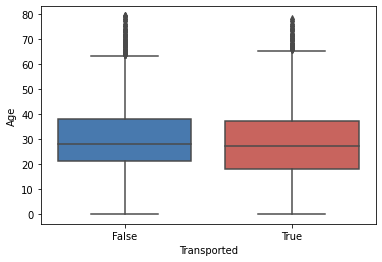

In [ ]:
ax = sns.boxplot(x=df_train['Transported'], y=df_train["Age"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_age_transported", dpi=400)

In [ ]:
StudentTestSigni(df_train[df_train['Transported'] == False]["Age"].dropna(), df_train[df_train['Transported'] == True]["Age"].dropna())

Les valeurs sont significativement différentes (p = 4.17043126378173e-12)


In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,True,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


Vaut-il mieux être en train de dormir en cryoconcervation pour survivre à une tempête galactique ou non ?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

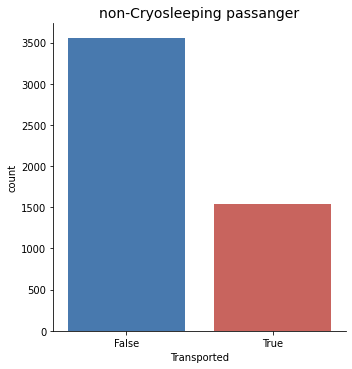

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['CryoSleep']== False], kind='count')
plt.title("non-Cryosleeping passanger", fontsize=14);
ax.savefig("Proportion of non-Cryosleeping passanger transported", dpi=400)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

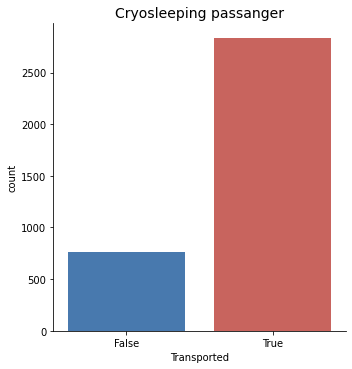

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['CryoSleep']== True], kind='count')
plt.title("Cryosleeping passanger", fontsize=14);
ax.savefig("Proportion of Cryosleeping passanger transported", dpi=400)

L'état (cryosleeping or not) est une variable intéressante pour notre modèle

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


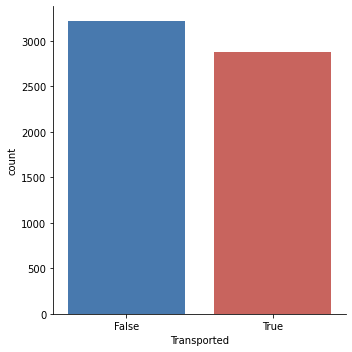

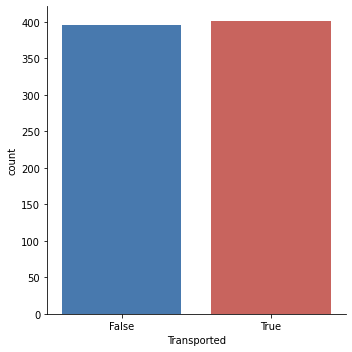

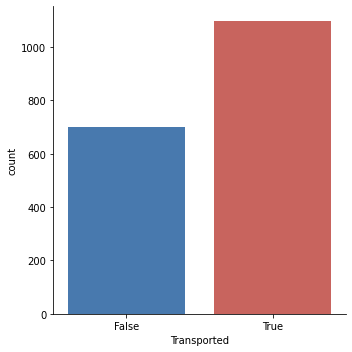

In [ ]:
sns.catplot('Transported', data=df_train[df_train['Destination']== "TRAPPIST-1e"], kind='count')
sns.catplot('Transported', data=df_train[df_train['Destination']== "PSO J318.5-22"], kind='count')
sns.catplot('Transported', data=df_train[df_train['Destination']== "55 Cancri e"], kind='count')
plt.tight_layout()
plt.show()

Les passagers pour *55 Cancri e* semblent avoir été plus chanceux, pn peut garder cette variable qui semble avoir un impact

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


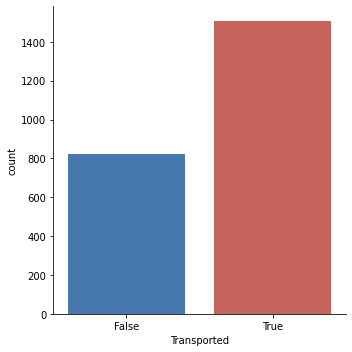

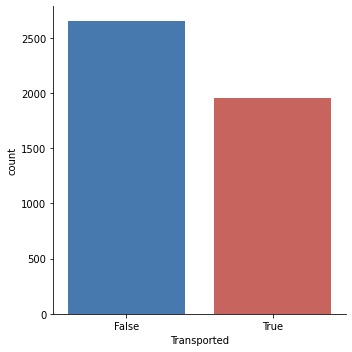

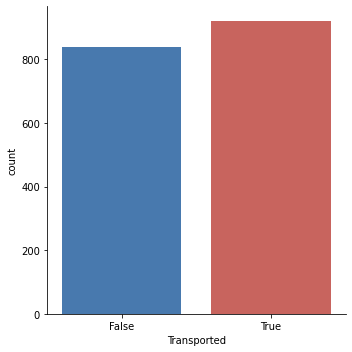

In [ ]:
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Europa"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Earth"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Mars"], kind='count')
plt.tight_layout()
plt.show()

Il semble y avoir un impact de la planète d'origine, on garde cette variable pour le modèle

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


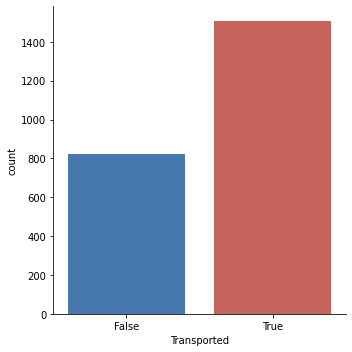

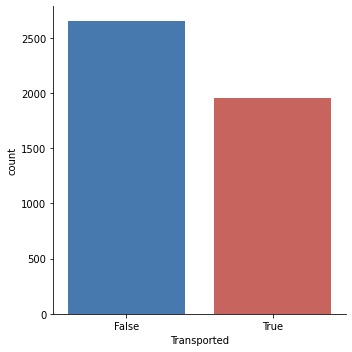

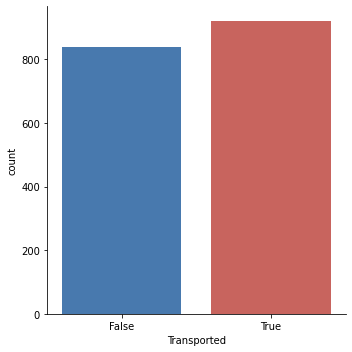

In [ ]:
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Europa"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Earth"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Mars"], kind='count')
plt.tight_layout()
plt.show()

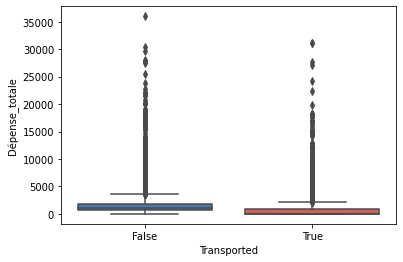

In [ ]:
ax = sns.boxplot(x=df_train['Transported'], y=df_train["Dépense_totale"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_montant_transported", dpi=400)

In [ ]:
StudentTestSigni(df_train[df_train['Transported'] == False]["Dépense_totale"].dropna(), df_train[df_train['Transported'] == True]["Dépense_totale"].dropna())

Les valeurs sont significativement différentes (p = 5.2967769133475176e-79)


Il y a un impact du montant dépensé, on garde la variable

Corrélation entre variables

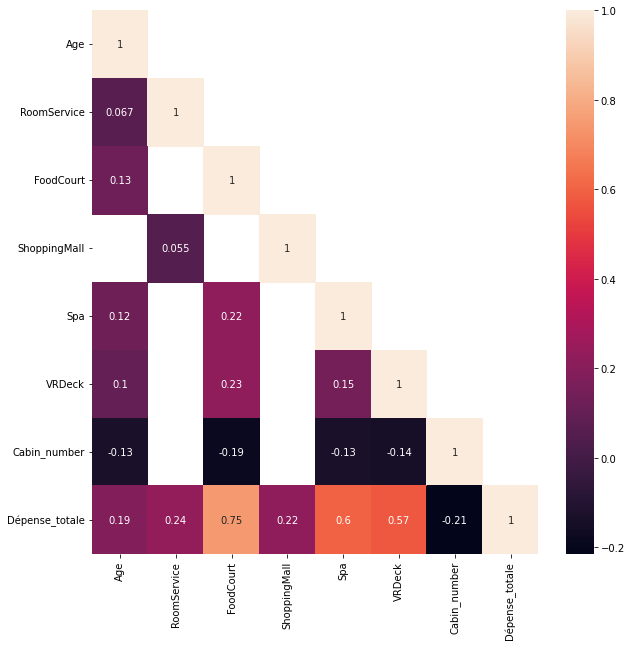

In [ ]:
def corr_sig(df=None):
	p_matrix = np.zeros(shape=(df_quantitative_features.shape[1],df_quantitative_features.shape[1]))
	for col in df_quantitative_features.columns:
		for col2 in df_quantitative_features.drop(col,axis=1).columns:
			_ , p = stats.pearsonr(df_quantitative_features[col],df_quantitative_features[col2])
			p_matrix[df_quantitative_features.columns.to_list().index(col),df_quantitative_features.columns.to_list().index(col2)] = p
	return p_matrix

p_values = corr_sig(df_quantitative_features)                     # get p-Value
mask = np.invert(np.tril(p_values<0.001))    # mask - only get significant corr

plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_quantitative_features.corr(), mask=mask, annot=True)
figure_pvalue= ax.get_figure()
#figure_pvalue.savefig("heatmap_quantitative_variables_pvalue", dpi=400)

Avec la sélection par p<0.05

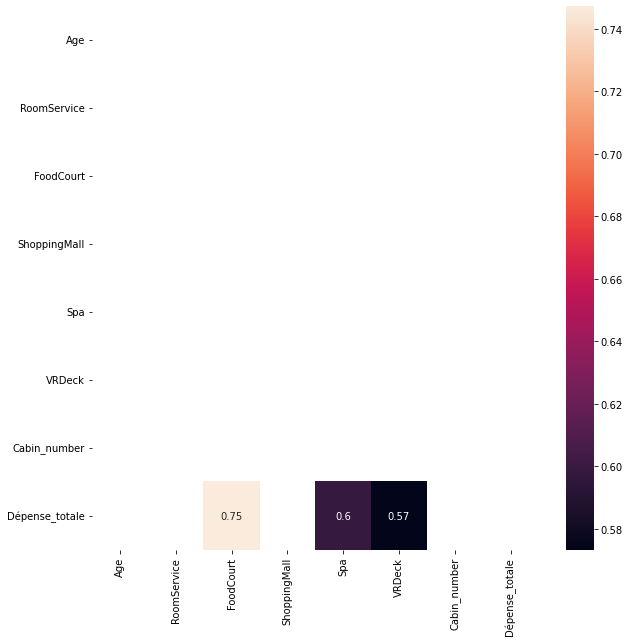

In [ ]:
def corr_corr(df=None):
	corr = np.zeros(shape=(df_quantitative_features.shape[1],df_quantitative_features.shape[1]))
	for col in df_quantitative_features.columns:
		for col2 in df_quantitative_features.drop(col,axis=1).columns:
			c , p = stats.pearsonr(df_quantitative_features[col],df_quantitative_features[col2])
			corr[df_quantitative_features.columns.to_list().index(col),df_quantitative_features.columns.to_list().index(col2)] = c
	return corr


def corr_pvalue(df=None):
	p_matrix = np.zeros(shape=(df_quantitative_features.shape[1],df_quantitative_features.shape[1]))
	for col in df_quantitative_features.columns:
		for col2 in df_quantitative_features.drop(col,axis=1).columns:
			c , p = stats.pearsonr(df_quantitative_features[col],df_quantitative_features[col2])
			p_matrix[df_quantitative_features.columns.to_list().index(col),df_quantitative_features.columns.to_list().index(col2)] = p
	return p_matrix


p_values = corr_pvalue(df_quantitative_features)                   # get p-values
corr = corr_corr(df_quantitative_features)                     # get R values
maskP = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
maskR = np.invert(np.tril(corr>0.45))
mask = maskP + maskR

plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_quantitative_features.corr(), mask=mask, annot=True)
figure_pvalue_corr = ax.get_figure()
#figure_pvalue_corr.savefig("heatmap_quantitative_variables_pvalue_corr", dpi=400)

Il n'y a qu'entre les variables de dépense qu'il existe une corrélation, ce qui est assez logique, je supprime donc les variables de dépense pour ne garder que la somme totale

In [ ]:
list_to_drop = ["FoodCourt", "Spa", "ShoppingMall", "RoomService", "VRDeck"]
df_train = df_train.drop(list_to_drop, axis = 1)
df_test = df_test.drop(list_to_drop, axis = 1)

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,
0001_01,Europa,True,TRAPPIST-1e,39.0,False,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,True,S,G,1500.0,1873.0


In [ ]:
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.000000,False,S,G,3,0.0
0018_01,Earth,False,TRAPPIST-1e,19.000000,False,S,F,4,2832.0
0019_01,Europa,True,55 Cancri e,31.000000,False,S,C,0,0.0
0021_01,Europa,False,TRAPPIST-1e,38.000000,False,S,C,1,7418.0
0023_01,Earth,False,TRAPPIST-1e,20.000000,False,S,F,5,645.0
...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.000000,False,S,G,1496,0.0
9269_01,Earth,False,TRAPPIST-1e,42.000000,False,S,G,95,1018.0
9271_01,Mars,True,55 Cancri e,28.658146,False,P,D,296,0.0


In [ ]:
df_train.isna().sum() 

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Transported       0
Side              0
Deck              0
Cabin_number      0
Dépense_totale    0
dtype: int64

In [ ]:
df_train.to_csv('data_projet8_TRAIN_clean.csv', index=True)

In [ ]:
df_test.to_csv('data_projet8_TEST_clean.csv', index=True)

# Préparation des données

In [ ]:
df_train_mod = pad.read_csv('data_projet8_TRAIN_clean.csv')
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
features_Qual = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Side', 'Deck']
features_Quant = ['Age', 'Cabin_number', 'Dépense_totale']

Préparation des données quantitatives (standardisation) et catégorielles (encodage)

In [ ]:
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_train_mod[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_train_mod[features_Qual])

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Earth',
 'x0_Europa',
 'x0_Mars',
 'x1_False',
 'x1_True',
 'x2_55 Cancri e',
 'x2_PSO J318.5-22',
 'x2_TRAPPIST-1e',
 'x3_False',
 'x3_True',
 'x4_P',
 'x4_S',
 'x5_A',
 'x5_B',
 'x5_C',
 'x5_D',
 'x5_E',
 'x5_F',
 'x5_G',
 'x5_T']

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_train_mod[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_train_mod[features_Quant].columns, data = df_features_Quant).set_index(df_train_mod.index)

Création de la database

In [ ]:
df_train_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_train_mod[features_Qual])).set_index(df_train_mod.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_train_norm

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x4_P,x4_S,x5_A,x5_B,x5_C,x5_D,x5_E,x5_F,x5_G,x5_T
0,0.709437,-1.194693,-0.524832,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.336717,-1.194693,-0.253046,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.034566,-1.194693,3.309341,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290975,-1.194693,1.386531,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.894666,-1.192722,-0.121954,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.848924,-1.001525,2.627291,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,-0.755179,1.759984,-0.524832,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8690,-0.197230,1.761955,0.166819,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8691,0.221232,0.003735,1.187492,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_train_norm.to_csv('data_projet8_TRAIN_mod.csv', index=False)

In [ ]:
df_train_norm = pad.read_csv('data_projet8_TRAIN_mod.csv')
df_train_mod = pad.read_csv('data_projet8_TRAIN_clean.csv')

In [ ]:
df_train_norm

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x4_P,x4_S,x5_A,x5_B,x5_C,x5_D,x5_E,x5_F,x5_G,x5_T
0,0.709437,-1.194693,-0.524832,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.336717,-1.194693,-0.253046,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.034566,-1.194693,3.309341,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290975,-1.194693,1.386531,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.894666,-1.192722,-0.121954,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.848924,-1.001525,2.627291,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,-0.755179,1.759984,-0.524832,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8690,-0.197230,1.761955,0.166819,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8691,0.221232,0.003735,1.187492,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Prise en compte du nom des passagers et on garde toutes les dépenses (meilleur score avec ces derniers éléments contrairement aux premières soumissions ne les prenant pas en compte

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
variables_depense = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for elm in variables_depense:
    df_train[elm] = np.where((df_train[elm].isna()) & (df_train['CryoSleep'] == True), 0, df_train[elm])
    df_train.loc[df_train[elm].isna(), elm] = df_train[elm].mean()

In [ ]:
df_train['Name'] = df_train['Name'].astype(str)

In [ ]:
def split_firstname(input):
    fistname = input.split()
    fistname = fistname[0]
    return fistname

In [ ]:
def split_lastname(input):
    lastname = input.split()
    try :
        lastname = lastname[1]
    except :
        lastname = "Doe"
    return lastname

In [ ]:
df_train['Firstname'] = df_train['Name'].apply(split_firstname)

In [ ]:
df_train['Surname'] = df_train['Name'].apply(split_lastname)

In [ ]:
def encoder_name(input_text):
    return  tf.keras.preprocessing.text.one_hot(input_text, n = len(input_text), lower=True)   

In [ ]:
df_train['Firstname_encod'] = df_train['Firstname'].apply(encoder_name)

In [ ]:
df_train['Surname_encod'] = df_train['Surname'].apply(encoder_name)

In [ ]:
def get_values_from_list(input):
    return sum(input)

In [ ]:
df_train['Surname_encod'] = df_train['Surname_encod'].apply(get_values_from_list)
df_train['Firstname_encod'] = df_train['Firstname_encod'].apply(get_values_from_list)

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Firstname,Surname,Firstname_encod,Surname_encod
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy,1,7
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines,3,3
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent,1,5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent,1,5
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,1,8
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley,3,5
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon,3,3
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre,4,8


In [ ]:
df_train_full = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Firstname_encod', 'Surname_encod']]

In [ ]:
df_train_full

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.0,0.0,0.0,0.0,0.0,1,7
1,109.0,9.0,25.0,549.0,44.0,3,3
2,43.0,3576.0,0.0,6715.0,49.0,1,5
3,0.0,1283.0,371.0,3329.0,193.0,1,5
4,303.0,70.0,151.0,565.0,2.0,4,7
...,...,...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0,1,8
8689,0.0,0.0,0.0,0.0,0.0,3,5
8690,0.0,0.0,1872.0,1.0,0.0,3,3
8691,0.0,1049.0,0.0,353.0,3235.0,4,8


In [ ]:
df_train_norm_full = df_train_norm.merge(df_train_full, left_index = True, right_index = True)

In [ ]:
#nomalisation
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

In [ ]:
df_train_norm_full = df_train_norm_full.apply(minmax_norm)

In [ ]:
df_train_norm_full

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.493671,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667
1,0.303797,0.000000,0.020452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.4,0.222222
2,0.734177,0.000000,0.288521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.444444
3,0.417722,0.000000,0.143830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.444444
4,0.202532,0.000528,0.030317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.051742,0.237197,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,0.777778
8689,0.227848,0.791447,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.4,0.444444
8690,0.329114,0.791975,0.052047,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.4,0.222222
8691,0.405063,0.321014,0.128852,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.6,0.777778


In [ ]:
df_train_norm_full.to_csv('df_train_norm_full.csv', index = False)

J'applique la même chose sur df_test

In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Firstname,Surname,Firstname_encod,Surname_encod
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,Nelly,Carsoning,4,4
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,Lerome,Peckers,5,3
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,Sabih,Unhearfus,1,7
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,Meratz,Caltilter,4,5
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,Brence,Harperez,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,Jeron,Peter,3,3
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Matty,Scheron,3,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,Jayrin,Pore,1,3
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,Kitakan,Conale,1,2


In [ ]:
variables_depense = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for elm in variables_depense:
    df_test[elm] = np.where((df_test[elm].isna()) & (df_test['CryoSleep'] == True), 0, df_test[elm])
    df_test.loc[df_test[elm].isna(), elm] = df_test[elm].mean()

df_test['Name'] = df_test['Name'].astype(str)
df_test['Firstname'] = df_test['Name'].apply(split_firstname)
df_test['Surname'] = df_test['Name'].apply(split_lastname)
df_test['Firstname_encod'] = df_test['Firstname'].apply(encoder_name)
df_test['Surname_encod'] = df_test['Surname'].apply(encoder_name)
df_test['Surname_encod'] = df_test['Surname_encod'].apply(get_values_from_list)
df_test['Firstname_encod'] = df_test['Firstname_encod'].apply(get_values_from_list)
df_test_full = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Firstname_encod', 'Surname_encod']]
df_test_norm_full = df_test_norm.merge(df_test_full, left_index = True, right_index = True)
df_test_norm_full = df_test_norm_full.apply(minmax_norm)

In [ ]:
df_test_norm_full

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.341772,0.001587,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.6,0.333333
1,0.240506,0.002116,0.084120,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.8,0.222222
2,0.392405,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.666667
3,0.481013,0.000529,0.220341,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,0.6,0.444444
4,0.253165,0.002646,0.019159,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.4,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.791534,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.4,0.222222
4273,0.531646,0.050265,0.030238,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.033514,0.00205,0.000504,0.006466,0.4,0.000000
4274,0.362761,0.156614,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.222222
4275,0.362761,0.157143,0.095140,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.106042,0.00000,0.000000,0.023482,0.0,0.111111


In [ ]:
df_test_norm_full.to_csv('df_test_norm_full.csv', index = False)

In [ ]:
X.columns

Index(['Age', 'Cabin_number', 'Dépense_totale', 'x0_Earth', 'x0_Europa',
       'x0_Mars', 'x1_False', 'x1_True', 'x2_55 Cancri e', 'x2_PSO J318.5-22',
       'x2_TRAPPIST-1e', 'x3_False', 'x3_True', 'x4_P', 'x4_S', 'x5_A', 'x5_B',
       'x5_C', 'x5_D', 'x5_E', 'x5_F', 'x5_G', 'x5_T', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Firstname_encod',
       'Surname_encod'],
      dtype='object')

In [ ]:
# Split des données (avec toutes les données dont le nom)
X = pad.read_csv('df_train_norm_full.csv')
df_y = pad.read_csv('data_projet8_TRAIN_clean.csv')
y=df_y["Transported"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state = 7)

In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 7)

# Segmentation des passagers - modélisation - Machine Learning

Fonction pour entrainer le modèle et évaluer les performances

In [ ]:
def run_model_and_performance_check(model):

    # Choix du model et entrainement
    model_regr = model
    model_regr.fit(X_train, y_train)

    # Prédiction du modèle et archivage des résultats
    y_pred = model_regr.predict(X_test)

    # Création des dataframes résultats
    results_regression = np.array([model_regr.score(X_train,y_train), model_regr.score(X_test,y_test)])
    df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction"], columns = [str(model)[:-2]])
    df_results[str(model)[:-2]] = results_regression

    return df_results

Test d'un Linear et Ridge classifier pour voir les performances de base

In [ ]:
run_model_and_performance_check(LinearDiscriminantAnalysis())

,LinearDiscriminantAnalysis
Score entrainement,0.772338
Score de prédiction,0.790805


In [ ]:
run_model_and_performance_check(RidgeClassifier())

,RidgeClassifier
Score entrainement,0.770037
Score de prédiction,0.793103


Evaluation des meilleurs hyperparamètres pour chaque modèle par gridsearch et validation croisée

### KNeighbors Classifier hyperparameters tuning

In [ ]:
KNeighborsClassifier_parameters = {'leaf_size':list(range(1,50)), 'n_neighbors':list(range(1,30)), 'p':[1,2]}
KNeighborsClassifier_GridSearchCV = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = KNeighborsClassifier_parameters, cv = 5, n_jobs=-1)
KNeighborsClassifier_GridSearchCV.fit(X_train, y_train)
KNeighborsClassifier_GridSearchCV.best_params_
print("KNeighborsClassifier best param = " + str(KNeighborsClassifier_GridSearchCV.best_params_))

KNeighborsClassifier best param = {'leaf_size': 1, 'n_neighbors': 12, 'p': 1}


In [ ]:
#return : KNeighborsClassifier best param = {'leaf_size': 13, 'n_neighbors': 29, 'p': 1}
#return : KNeighborsClassifier best param = {'leaf_size': 1, 'n_neighbors': 12, 'p': 1} # for all data

### GaussianNB Classifier hyperparameters tuning

In [ ]:
GaussianNB_parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
GaussianNB_GridSearchCV = GridSearchCV(estimator = GaussianNB(), param_grid = GaussianNB_parameters, cv = 5, n_jobs=-1)
GaussianNB_GridSearchCV.fit(X_train, y_train)
GaussianNB_GridSearchCV.best_params_
print("GaussianNB best param = " +str(GaussianNB_GridSearchCV.best_params_))

GaussianNB best param = {'var_smoothing': 0.001873817422860383}


In [ ]:
#return : GaussianNB best param = {'var_smoothing': 0.1873817422860384}
#return : GaussianNB best param = {'var_smoothing': 0.001873817422860383} # for all data

### DecisionTree Classifier hyperparameters tuning

In [ ]:
DecisionTreeClassifier_parameters = {'max_features' : [1,5,10,15,25,28,30, 'auto', 'sqrt', '“log2'], 'max_depth': [2, 10, 15,18,20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"],'min_samples_split' : np.linspace(0.1, 1.0, 5, endpoint=True).tolist()}
DecisionTreeClassifier_GridSearchCV = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = DecisionTreeClassifier_parameters, cv = 5, n_jobs=-1, verbose = 2)
DecisionTreeClassifier_GridSearchCV.fit(X_train, y_train)
DecisionTreeClassifier_GridSearchCV.best_params_
print("DecisionTreeClassifier best param = " +str(DecisionTreeClassifier_GridSearchCV.best_params_))

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3760 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 8288 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 12373 tasks      | elapsed:   12.0s


DecisionTreeClassifier best param = {'criterion': 'entropy', 'max_depth': 15, 'max_features': 25, 'min_samples_leaf': 20, 'min_samples_split': 0.1}


[Parallel(n_jobs=-1)]: Done 12500 out of 12500 | elapsed:   12.2s finished


In [ ]:
run_model_and_performance_check(DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 20, max_features = 25, min_samples_split = 0.1))

,"DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=25,\n min_samples_leaf=20, min_samples_split=0."
Score entrainement,0.773879
Score de prédiction,0.804598


In [ ]:
'min_samples_splits' :np.linspace(0.1, 1.0, 10, endpoint=True).tolist()

In [ ]:
#return : DecisionTreeClassifier best param = {criterion = 'gini', max_depth = 10, min_samples_leaf = 100}
#return : DecisionTreeClassifier best param = {criterion = 'gini', max_depth = 20, min_samples_leaf = 20} # for all data

### SVM Classifier hyperparameters tuning

In [ ]:
SVC_parameters = {'C': [90,100,110,120], 'gamma': [0.08,0.09,0.1,0.11], 'kernel': ['rbf'], 'probability': [True]}
SVC_GridSearchCV = GridSearchCV(estimator = SVC(), param_grid = SVC_parameters, cv=5, n_jobs=-1, verbose=2)
SVC_GridSearchCV.fit(X_train, y_train)
SVC_GridSearchCV.best_params_
print("SVC best param = " +str(SVC_GridSearchCV.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


SVC best param = {'C': 100, 'gamma': 0.08, 'kernel': 'rbf', 'probability': True}


In [ ]:
run_model_and_performance_check(SVC(C=100, kernel= 'rbf', gamma =0.1, probability = True))

,"SVC(C=100, gamma=0.1, probability=Tru"
Score entrainement,0.821552
Score de prédiction,0.816092


In [ ]:
run_model_and_performance_check(SVC(C=100, kernel= 'rbf', gamma =0.08, probability = True))

,"SVC(C=100, gamma=0.08, probability=Tru"
Score entrainement,0.818615
Score de prédiction,0.816092


In [ ]:
#return : SVC best param = {C : '1', kernel : 'rbf'}
#return : SVC best param = {C : '10', kernel : 'rbf'} # for all data

In [ ]:
List_of_models = [LinearDiscriminantAnalysis(), RidgeClassifier(), KNeighborsClassifier(leaf_size = 13, n_neighbors = 29, p= 1), GaussianNB(var_smoothing =  0.1873817422860384), DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 100), SVC(C= 1, kernel= 'rbf')]
List_of_models_for_graph = ["LinearDiscriminant", "Ridge", "KNeighbors", "GaussianNB", "DecisionTree", "SVC"]

In [ ]:
#for all data
List_of_models = [LinearDiscriminantAnalysis(), RidgeClassifier(), KNeighborsClassifier(leaf_size = 1, n_neighbors = 12, p= 1), GaussianNB(var_smoothing =  0.001873817422860383), DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 20, max_features = 25, min_samples_split = 0.1), SVC(C= 90, gamma=0.08, probability= True, kernel= 'rbf')]
List_of_models_for_graph = ["LinearDiscriminant", "Ridge", "KNeighbors", "GaussianNB", "DecisionTree", "SVC"]

In [ ]:
df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction"])

In [ ]:
for i in range(len(List_of_models)):
  model_regr = List_of_models[i] 
  model_regr.fit(X_train, y_train)
  y_pred = model_regr.predict(X_test)
  results_classification = np.array([model_regr.score(X_train,y_train), model_regr.score(X_test,y_test)])
  df_results[List_of_models_for_graph[i]] = results_classification

In [ ]:
df_results

,LinearDiscriminant,Ridge,KNeighbors,GaussianNB,DecisionTree,SVC
Score entrainement,0.773995,0.773182,0.789798,0.750871,0.776667,0.816523
Score de prédiction,0.758621,0.758621,0.770115,0.793103,0.827586,0.816092


In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

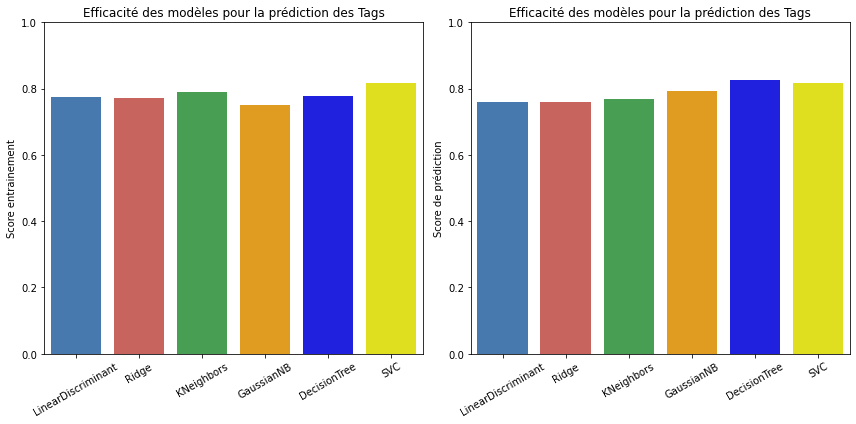

In [ ]:
df_graph = df_results.transpose()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1 = sns.barplot(x=df_graph.index, y=df_graph["Score entrainement"].values, data=df_graph, ax=axs[0], palette = custom_palette)
ax2 = sns.barplot(x=df_graph.index, y=df_graph["Score de prédiction"].values, data=df_graph, ax=axs[1], palette = custom_palette)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax1.set_title('Efficacité des modèles pour la prédiction des Tags')
ax1.set_ylabel('Score entrainement')
ax1.set(ylim=(0, 1))
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax2.set_title('Efficacité des modèles pour la prédiction des Tags')
ax2.set_ylabel('Score de prédiction')
ax2.set(ylim=(0, 1))

plt.tight_layout()
fig.savefig("Performance modèles classification all data", dpi=400)

Le modèle KNeighbors à l'air d'être pas mal, je le sauvegarde

In [ ]:
#Sauvegarde du modèle optimisé
model_class_KN = KNeighborsClassifier(leaf_size = 13, n_neighbors = 29, p= 1)
model_class_KN.fit(X_train, y_train)
dump(model_class_KN, 'KNeighborsClassifier.joblib')

['KNeighborsClassifier.joblib']

Finalement le modèle SVC à l'air d'être le meilleur, je le sauvegarde

In [ ]:
#Sauvegarde du modèle optimisé pour all data
model_class_RF = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 20, max_features = 25, min_samples_split = 0.1)
model_class_RF.fit(X_train, y_train)
dump(model_class_RF, 'DecisionTreeClassifier.joblib')

model_class_SVC = SVC(C= 100, gamma=0.08, probability= True, kernel= 'rbf')
model_class_SVC.fit(X_train, y_train)
dump(model_class_SVC, 'SVC.joblib')

['SVC.joblib']

### CatBoost Classifier

certains compétiteurs du kaggle utilisaient CatBoost, je le teste sur mon jeu de données :

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
y_test_bin = np.where(y_test == True, 1,0)

In [ ]:
X_train= X_train.astype('str')

In [ ]:
X_test= X_test.astype('str')

In [ ]:
CatBoostClassifier_parameters = {'n_estimators': [100], 'max_depth':[8]}
CatBoostClassifier_GridSearchCV = GridSearchCV(estimator = CatBoostClassifier(), param_grid = CatBoostClassifier_parameters, cv = 5, n_jobs=-1, verbose=2)
CatBoostClassifier_GridSearchCV.fit(X_train, y_train_bin)
CatBoostClassifier_GridSearchCV.best_params_
print("CatBoostClassifier best param = " + str(CatBoostClassifier_GridSearchCV.best_params_))

In [ ]:
model = CatBoostClassifier(n_estimators = 100, max_depth=8)
cat_features = [0, 1]
model.fit(X_train, y_train_bin, cat_features)

In [ ]:
model.score(X_test,y_test_bin)

0.8103448275862069

In [ ]:
#Sauvegarde du modèle optimisé pour all data
model_class_CatBoost = CatBoostClassifier(n_estimators = 100, max_depth=8)
model_class_CatBoost.fit(X_train, y_train_bin, cat_features)
dump(model_class_CatBoost, 'CatBoost.joblib')

après soumission des prédictions du Catboost, celui-ci ne donne pas de meilleurs résultats que le meilleur modèle ci-dessus

# Segmentation des passagers - modélisation - Deep Learning

## Deep Learning 1

In [ ]:
#importation des données
X = pad.read_csv('df_train_norm_full.csv')
df_y = pad.read_csv('data_projet8_TRAIN_clean.csv')
y=df_y["Transported"]

In [ ]:
#hot encoder
#binarisaion de l'information du transport ou non

def onehot(x):
  if x==0:
    vec=[0,1]
  else :
    vec=[1,0]
  return vec

y= pad.DataFrame(map(onehot, y))

In [ ]:
y

,0,1
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
8688,0,1
8689,0,1
8690,1,0
8691,0,1


In [ ]:
#nomalisation
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

X = minmax_norm(X)
X

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.493671,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667
1,0.303797,0.000000,0.020452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.4,0.222222
2,0.734177,0.000000,0.288521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.444444
3,0.417722,0.000000,0.143830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.444444
4,0.202532,0.000528,0.030317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.051742,0.237197,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,0.777778
8689,0.227848,0.791447,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.4,0.444444
8690,0.329114,0.791975,0.052047,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.4,0.222222
8691,0.405063,0.321014,0.128852,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.6,0.777778


In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 7)
X_train

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
5854,0.594937,0.099261,0.029344,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000349,0.034448,0.00000,0.001071,0.000000,0.4,0.222222
1837,0.000000,0.166843,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.222222
2235,0.582278,0.088701,0.045155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.018683,0.00000,0.012808,0.032362,0.0,0.777778
7353,0.544304,0.134636,0.616250,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.565391,0.00000,0.193859,0.040484,0.4,0.777778
5224,0.227848,0.609293,0.022869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.052279,0.000000,0.00315,0.000000,0.000000,0.6,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,0.101266,0.116684,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.8,0.000000
919,0.202532,0.107709,0.018507,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000209,0.000000,0.00149,0.006694,0.019807,0.2,0.222222
4307,0.367089,0.455121,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.4,0.222222
5699,0.189873,0.118796,0.112318,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.022708,0.00000,0.007988,0.132018,0.0,0.666667


In [ ]:
#entrainement du model

model = keras.Sequential([keras.Input(shape=(30,)),
                          keras.layers.Dense(782, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.BatchNormalization(), 
                          keras.layers.Dense(782, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.BatchNormalization(),
                          #keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(2, activation='softmax')]) #hard_sigmoid #


model.compile(optimizer='Nadam', #Ftrl
              loss='BinaryCrossentropy',
              metrics=['BinaryAccuracy'])#Recall


#######create callback
filepath = '/content/my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 

                             monitor='val_binary_accuracy',

                             verbose=1, 

                             save_best_only=True,

                             mode='max')

callbacks = [checkpoint]

######train model
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=300, batch_size=int(len(X_train)/10),callbacks=callbacks,shuffle=True) #,validation_split=0.2,) #, batch_size=64
model.summary()

#Load best model
#model = keras.models.load_model(filepath)

Epoch 1/300
 9/11 [=======================>......] - ETA: 0s - loss: 0.6890 - binary_accuracy: 0.6939
Epoch 1: val_binary_accuracy improved from -inf to 0.59425, saving model to /content/my_best_model.hdf5
11/11 [==============================] - 2s 46ms/step - loss: 0.6815 - binary_accuracy: 0.6974 - val_loss: 0.6544 - val_binary_accuracy: 0.5943
Epoch 2/300
 9/11 [=======================>......] - ETA: 0s - loss: 0.5863 - binary_accuracy: 0.7353
Epoch 2: val_binary_accuracy did not improve from 0.59425
11/11 [==============================] - 0s 17ms/step - loss: 0.5842 - binary_accuracy: 0.7357 - val_loss: 0.6556 - val_binary_accuracy: 0.5172
Epoch 3/300
 9/11 [=======================>......] - ETA: 0s - loss: 0.5553 - binary_accuracy: 0.7408
Epoch 3: val_binary_accuracy did not improve from 0.59425
11/11 [==============================] - 0s 18ms/step - loss: 0.5534 - binary_accuracy: 0.7417 - val_loss: 0.6471 - val_binary_accuracy: 0.5713
Epoch 4/300
 9/11 [=======================

In [ ]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 3ms/step - loss: 0.4047 - binary_accuracy: 0.8207


[0.40469956398010254, 0.8206896781921387]

In [ ]:
###sauvegarde du model:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


## Deep Learning 2 : optimisation des hyperparamètres du modèle de deep learning par l'algo de keras-tuner

In [ ]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

%pip install keras-tuner --upgrade
import keras_tuner as kt

In [ ]:
#importation des données
X = pad.read_csv('df_train_norm_full.csv')
df_y = pad.read_csv('data_projet8_TRAIN_clean.csv')
y=df_y["Transported"]

In [ ]:
#hot encoder
#tf.keras.preprocessing.text.one_hot (pour du text comme les noms)

def onehot(x):
  if x==0:
    vec=[0,1]
  else :
    vec=[1,0]
  return vec

y= pad.DataFrame(map(onehot, y))
y

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  #model.add(keras.Input(shape=(30,)))

 #limitation recherche des denses layers:
  min_dense=100
  max_dense=int(len(X)/10)
  step_dense=int(100)


 #first layers

  hp_activation=hp.Choice('Fonction_activation_1',["elu","gelu","relu","selu"])    #["elu","gelu","relu","selu"]) 
  hp_units = hp.Int('NdenseLayers1', min_value=min_dense, max_value=max_dense, step=step_dense)
  model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))

 # model.add(keras.layers.Dense(units=1140, activation="selu"))

  hp_DO = hp.Int('DropOut1:[%]', min_value=0, max_value=80, step=10)
  model.add(keras.layers.Dropout(rate=hp_DO/100))
  #model.add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.BatchNormalization()) 

  #second layers

  hp_activation2=hp.Choice('Fonction_activation_2',["elu","gelu","relu","selu"]) 
  hp_units2 = hp.Int('NdenseLayers2', min_value=min_dense, max_value=max_dense, step=step_dense)
  model.add(keras.layers.Dense(units=hp_units2, activation= hp_activation2))

  hp_DO2 = hp.Int('DropOut2:[%]', min_value=10, max_value=80, step=10)
  #model.add(keras.layers.Dropout(rate=hp_DO2/100))
  model.add(keras.layers.BatchNormalization()) 
  
  #third layers

  hp_activation3=hp.Choice('Fonction_activation_3',["sigmoid","hard_sigmoid","softmax","swish","tanh"])
  model.add(keras.layers.Dense(2, activation=hp_activation3))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,5e-2,1e-2, 5e-3,1e-3,5e-4])
 
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss='BinaryCrossentropy',
              metrics=['BinaryAccuracy'])#Recall


  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_binary_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='/content/sample_data',
                     project_name='Optim4')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X, y, validation_split=0.2, callbacks=[stop_early])#,batch_size=int(len(X)/10)) #,batch_size=,epochs=100,)

Trial 254 Complete [00h 00m 17s]
val_binary_accuracy: 0.7403680086135864

Best val_binary_accuracy So Far: 0.8004600405693054
Total elapsed time: 00h 44m 32s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(num_trials=1)

Results summary
Results in /content/sample_data/Optim4
Showing 1 best trials
Trial summary
Hyperparameters:
Fonction_activation_1: relu
NdenseLayers1: 300
DropOut1:[%]: 50
Fonction_activation_2: elu
NdenseLayers2: 500
DropOut2:[%]: 10
Fonction_activation_3: sigmoid
learning_rate: 0.05
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0134
Score: 0.8004600405693054


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

tuner.results_summary(num_trials=1)# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)

#######create callback
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=1,
                             patience=5, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]


history = model.fit(X, y, epochs=300,validation_split=0.2,callbacks=callbacks, verbose=0)#,batch_size=int(len(X)/10))# batch_size=int(len(X_train)/10),callbacks=callbacks, verbose=0) #,validation_split=0.2,shuffle=True) #, batch_size=64
#model.fit(x, y, batch_size=32, epochs=10)

model.summary()

#Load best model
model = keras.models.load_model('my_best_model.hdf5')

In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 7)

In [ ]:
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)
y_predicted = model.predict(X_test)
verite=y_test[1]
predictions = np.argmax(y_predicted, axis=1)
sklearn.metrics.accuracy_score(verite,predictions)

28/28 [==============================] - 0s 7ms/step - loss: 0.4335 - binary_accuracy: 0.8006


0.8022988505747126

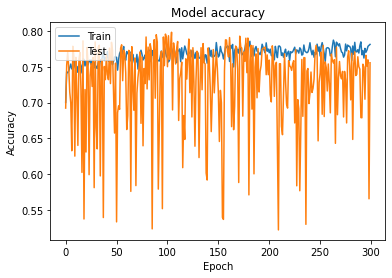

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

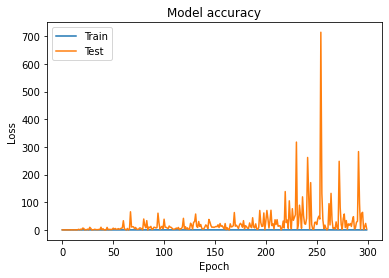

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('model_DP')

INFO:tensorflow:Assets written to: model_DP/assets


## Deep Learning 3 : Multi-Layer-Perceptron (Pytorch)

In [8]:
#importation des données
train_df = pad.read_csv('df_train_norm_full.csv')
df_y = pad.read_csv('data_projet8_TRAIN_clean.csv')
train_labels_df=df_y[['Transported']]
test_df = pad.read_csv('df_test_norm_full.csv')

In [9]:
train_data, val_data, train_label, val_label = train_test_split(train_df, train_labels_df, test_size=0.1, random_state=7)

In [10]:
# From dataframe to tensor (train)
train_data_tensor = torch.tensor(train_data.values, dtype=torch.float32)
train_data_label = torch.tensor(train_label.values)

# val
val_data_tensor = torch.tensor(val_data.values, dtype=torch.float32)
val_data_label = torch.tensor(val_label.values)

# test
test_data_tensor = torch.tensor(test_df.values, dtype=torch.float32)

In [11]:
train_dataset = torch.utils.data.TensorDataset(train_data_tensor, train_data_label)
val_dataset = torch.utils.data.TensorDataset(val_data_tensor, val_data_label)

In [12]:
BATCH_SIZE = 128
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [13]:
train_df.head()

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.493671,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667
1,0.303797,0.000000,0.020452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.4,0.222222
2,0.734177,0.000000,0.288521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.444444
3,0.417722,0.000000,0.143830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.444444
4,0.202532,0.000528,0.030317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.6,0.666667


In [14]:
len(train_df.columns)

30

In [15]:
model = nn.Sequential(
          nn.Linear(30, 128),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(128, 256),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(256, 256),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(128, 1),
          )
model = model.to(device)
summary(model, (1,30))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]           3,968
              ReLU-2               [-1, 1, 128]               0
           Dropout-3               [-1, 1, 128]               0
            Linear-4               [-1, 1, 256]          33,024
              ReLU-5               [-1, 1, 256]               0
           Dropout-6               [-1, 1, 256]               0
            Linear-7               [-1, 1, 256]          65,792
              ReLU-8               [-1, 1, 256]               0
           Dropout-9               [-1, 1, 256]               0
           Linear-10               [-1, 1, 128]          32,896
             ReLU-11               [-1, 1, 128]               0
          Dropout-12               [-1, 1, 128]               0
           Linear-13                 [-1, 1, 1]             129
Total params: 135,809
Trainable params:

In [16]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [17]:
def mixup_data(x, y):
    alpha = 1.0
    lam = np.random.beta(alpha, alpha)  # choose an interpolation coefficient lambda at random
    perm = torch.randperm(x.shape[0])  # generate random permutation of the batch
    return (lam * x + (1 - lam) * x[perm], y, y[perm], lam)  # return mixed data, raw output, permuted output and lambda


def mix_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

In [18]:
loss_fn = nn.BCEWithLogitsLoss()
#loss_fn = nn.BCELoss()
LEARNING_RATE = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
#optimizer = torch.optim.NAdam(model.parameters(), lr=LEARNING_RATE)
PATH = ("MLP"+ "_bs"+ str(BATCH_SIZE)+ ".pth")

In [19]:
model = model.to(device)
model.train()
best_val_acc = 0.0
for epoch in range(100):
    print(f"Epoch {epoch+1}")
    loss = 0.0
    train_losses = 0.0
    train_acc = 0.0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        mixed_data, y_a, y_b, lam = mixup_data(inputs, labels)

        optimizer.zero_grad()

        predictions = model(mixed_data)

        loss = mix_criterion(loss_fn, predictions, y_a.float(), y_b.float(), lam)
        #loss = loss_fn(predictions, labels.float())
        #acc = binary_acc(predictions, labels.float())

        loss.backward()
        optimizer.step()

        train_losses += loss.item() 
        #train_acc += acc.item()

    print(f"Training Loss : {train_losses/len(train_dataloader)}")#\tTraining Accuracy : {train_acc/len(train_dataloader)}")


    with torch.no_grad():
        model.eval()

        loss = 0.0
        val_losses = 0.0
        val_acc = 0.0

        best_val_acc = 0.0

        
        for inputs, labels in val_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            predictions = model(inputs)

            loss = loss_fn(predictions, labels.float())
            acc = binary_acc(predictions, labels.float())

            val_losses += loss.item() 
            val_acc += acc.item()


        if best_val_acc <= val_acc/len(val_dataloader):
            best_epoch = epoch
            state = {"model": model.state_dict(), "val_acc": val_acc/len(val_dataloader), "epoch": best_epoch}
            torch.save(state, PATH)
            best_val_acc = val_acc/len(val_dataloader)

        print(f"Validation Loss : {val_losses/len(val_dataloader)}\tValidation Accuracy : {val_acc/len(val_dataloader)}")
print("-----------------")
print("Finished training")
print(f"Best Validation Accuracy is {best_val_acc}")

Epoch 1
Training Loss : 0.6395266527129758
Validation Loss : 0.5031067686421531	Validation Accuracy : 77.14285714285714
Epoch 2
Training Loss : 0.5777912226415449
Validation Loss : 0.48837375215121676	Validation Accuracy : 76.71428571428571
Epoch 3
Training Loss : 0.5741938208380053
Validation Loss : 0.4590407226766859	Validation Accuracy : 78.0
Epoch 4
Training Loss : 0.5700618081515835
Validation Loss : 0.45022958517074585	Validation Accuracy : 79.42857142857143
Epoch 5
Training Loss : 0.5628723381988464
Validation Loss : 0.4461782021181924	Validation Accuracy : 78.71428571428571
Epoch 6
Training Loss : 0.5427532441193058
Validation Loss : 0.4207327110426767	Validation Accuracy : 79.14285714285714
Epoch 7
Training Loss : 0.5396645742077981
Validation Loss : 0.4313072775091444	Validation Accuracy : 79.57142857142857
Epoch 8
Training Loss : 0.5376360560617139
Validation Loss : 0.4138705687863486	Validation Accuracy : 80.42857142857143
Epoch 9
Training Loss : 0.5384575998590838
Validati

In [22]:
dump(model, 'model_DL3.joblib')

['model_DL3.joblib']

# Prédiction du dataset ***estimation*** du Kaggle

## Machine Learning

### Préparation des données du fichier test

In [ ]:
#toutes les données (noms compris)
df_test_norm_full = pad.read_csv('df_test_norm_full.csv')

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_test_norm_full

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.341772,0.001587,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.6,0.333333
1,0.240506,0.002116,0.084120,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.8,0.222222
2,0.392405,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.666667
3,0.481013,0.000529,0.220341,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,0.6,0.444444
4,0.253165,0.002646,0.019159,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.4,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.791534,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.4,0.222222
4273,0.531646,0.050265,0.030238,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.033514,0.00205,0.000504,0.006466,0.4,0.000000
4274,0.362761,0.156614,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.222222
4275,0.362761,0.157143,0.095140,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.106042,0.00000,0.000000,0.023482,0.0,0.111111


Préparation des données quantitatives (standardisation) et catégorielles (encodage)

In [ ]:
features_Qual = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Side', 'Deck']
features_Quant = ['Age', 'Cabin_number', 'Dépense_totale']
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_test_mod[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Earth',
 'x0_Europa',
 'x0_Mars',
 'x1_False',
 'x1_True',
 'x2_55 Cancri e',
 'x2_PSO J318.5-22',
 'x2_TRAPPIST-1e',
 'x3_False',
 'x3_True',
 'x4_P',
 'x4_S',
 'x5_A',
 'x5_B',
 'x5_C',
 'x5_D',
 'x5_E',
 'x5_F',
 'x5_G',
 'x5_T']

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_test_mod[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_test_mod[features_Quant].columns, data = df_features_Quant).set_index(df_test_mod.index)

In [ ]:
df_test_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])).set_index(df_test_mod.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_test_norm.to_csv('df_test_norm.csv', index = False)

In [ ]:
#Chargement du modèle optimisé CatBoost
CatBoost = load('CatBoost.joblib')

In [ ]:
#Chargement du modèle optimisé
model_class_KN = load('KNeighborsClassifier.joblib')

In [ ]:
#Chargement du modèle optimisé pour toutes les données 01
model_class_RF = load('DecisionTreeClassifier.joblib')

#Chargement du modèle optimisé pour toutes les données 02
model_class_SVC = load('SVC.joblib')

In [ ]:
y_test_bin = np.where(y_test == True, 1,0)

In [ ]:
X_train= X_train.astype('str')

In [ ]:
df_test_norm_full_catboost= df_test_norm_full.astype('str')

In [ ]:
df_test_mod["Transported"] = CatBoost.predict(df_test_norm_full_catboost)

In [ ]:
df_test_mod["Transported"] = np.where(df_test_mod["Transported"] == 1, True, False)

In [ ]:
df_test_mod["Transported"] = model_class_RF.predict(df_test_norm_full)

In [ ]:
df_test_mod["Transported"] = model_class_SVC.predict(df_test_norm_full)

In [ ]:
df_test_mod["Transported"] = model_class_KN.predict(df_test_norm)

In [ ]:
df_test_norm_full

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.493671,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.2,0.666667
1,0.303797,0.000000,0.023684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.6,0.333333
2,0.734177,0.000000,0.334116,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.4,0.666667
3,0.417722,0.000000,0.166559,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,0.8,0.666667
4,0.202532,0.001067,0.035107,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.0,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.531646,0.318036,0.052098,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.4,0.333333
4273,0.354430,0.910352,0.045735,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.033514,0.00205,0.000504,0.006466,0.2,0.222222
4274,0.544304,1.000000,0.080577,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.2,0.111111
4275,0.696203,0.152615,0.184483,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.106042,0.00000,0.000000,0.023482,1.0,0.333333


In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Transported
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,S,G,3,0.0,1
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,S,F,4,2832.0,0
2,0019_01,Europa,True,55 Cancri e,31.000000,False,S,C,0,0.0,1
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,S,C,1,7418.0,1
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,S,F,5,645.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,S,G,1496,0.0,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,S,G,95,1018.0,1
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,P,D,296,0.0,1
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,P,D,297,3203.0,1


In [ ]:
df_test_mod.set_index('PassengerId')

,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Transported
PassengerId,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.000000,False,S,G,3,0.0,True
0018_01,Earth,False,TRAPPIST-1e,19.000000,False,S,F,4,2832.0,False
0019_01,Europa,True,55 Cancri e,31.000000,False,S,C,0,0.0,True
0021_01,Europa,False,TRAPPIST-1e,38.000000,False,S,C,1,7418.0,True
0023_01,Earth,False,TRAPPIST-1e,20.000000,False,S,F,5,645.0,True
...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.000000,False,S,G,1496,0.0,True
9269_01,Earth,False,TRAPPIST-1e,42.000000,False,S,G,95,1018.0,False
9271_01,Mars,True,55 Cancri e,28.658146,False,P,D,296,0.0,True


In [ ]:
#df_test_mod = df_test_mod.rename(columns={"Prediction_Transported": "Transported"})

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].to_csv('Projet8_prediction_ML_all_CatBoost.csv', index = False)

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


Résultat : ce modèle donne un score de 0.79074

## Deep Learning 1

In [ ]:
#toutes les données (noms compris)
df_test_norm_full = pad.read_csv('df_test_norm_full.csv')

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,S,G,3,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,S,F,4,2832.0
2,0019_01,Europa,True,55 Cancri e,31.000000,False,S,C,0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,S,C,1,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,S,F,5,645.0
...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,S,G,1496,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,S,G,95,1018.0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,P,D,296,0.0
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,P,D,297,3203.0


In [ ]:
#####charger model:
model_DL = keras.models.load_model("model")

In [ ]:
# pour toutes les données
X = df_test_norm_full

In [ ]:
probabilities = model_DL.predict(X)
predictions = np.argmax(probabilities, axis=1)

In [ ]:
probabilities

array([[2.1750128e-01, 7.8249866e-01],
       [8.1421376e-06, 9.9999189e-01],
       [1.0000000e+00, 3.2327769e-08],
       ...,
       [9.9998748e-01, 1.2476255e-05],
       [9.8773205e-01, 1.2267954e-02],
       [8.9682442e-01, 1.0317558e-01]], dtype=float32)

In [ ]:
predictions

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
# Pour toutes les données
df_test_norm_full['PassengerId'] = df_test_mod['PassengerId']
df_test_norm_full["Transported"] = predictions
df_test_norm_full["Transported"] = np.where(df_test_norm_full["Transported"] == 0, True, False)
df_test_norm_full.set_index('PassengerId')
df_test_norm_full[['PassengerId' , 'Transported']].to_csv('Projet8_prediction_DL_1.csv', index = False)

Résultat : ce modèle donne un score de 0.78209 (pas meilleur que machine learning SVC)

## Deep Learning 2 (utlisation de keras.tuner)

In [ ]:
#####charger model:
model = keras.models.load_model("model_DP")

#prediction:
df_X = pad.read_csv('df_test_norm_full.csv')
X_test=df_X
y_predicted = model.predict(X_test)
predictions = np.argmax(y_predicted, axis=1)

In [ ]:
y_predicted

array([[4.75774348e-01, 5.18704295e-01],
       [2.16258392e-02, 9.77672637e-01],
       [9.99811709e-01, 1.91481318e-04],
       ...,
       [9.89574850e-01, 1.03145335e-02],
       [7.12381303e-01, 2.82930404e-01],
       [9.84551966e-01, 1.53122637e-02]], dtype=float32)

In [ ]:
X

,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.493671,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667
1,0.303797,0.000000,0.020452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.4,0.222222
2,0.734177,0.000000,0.288521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.444444
3,0.417722,0.000000,0.143830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.444444
4,0.202532,0.000528,0.030317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.051742,0.237197,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,0.777778
8689,0.227848,0.791447,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.4,0.444444
8690,0.329114,0.791975,0.052047,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.4,0.222222
8691,0.405063,0.321014,0.128852,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.6,0.777778


In [ ]:
predictions

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_test_mod["Transported"] = predictions

In [ ]:
df_test_mod["Transported"] = np.where(df_test_mod["Transported"] == 0, True, False)

In [ ]:
df_test_mod.set_index('PassengerId')

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].to_csv('Projet8_prediction_DL_2.csv', index = False)

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].head(20)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


Résultat : ce modèle n'est pas meilleur que le modèle Deep Learning 1 ou Machine Learning

score = 0.78045

## Deep Learning 3 (MLP - Perceptron) à venir ;)

In [ ]:
#Chargement du modèle optimisé
model_DL3 = load('model_DL3.joblib')

In [ ]:
checkpoint = torch.load(PATH)
model_DL3.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [ ]:
with torch.no_grad():
    model_DL3.eval()
    test_data_tensor = test_data_tensor.to(device)
    test_predictions = model_DL3(test_data_tensor)
    predictions = torch.round(torch.sigmoid(test_predictions))

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [46]:
df_test_mod['Transported'] = predictions.cpu()>0

In [ ]:
df_test_mod.set_index('PassengerId')

In [49]:
df_test_mod[['PassengerId' , 'Transported']].to_csv('Projet8_prediction_DL_3.csv', index = False)

In [50]:
df_test_mod[['PassengerId' , 'Transported']].head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


Résultat : ce modèle est le meilleur que j'obtiens et me permet d'avoir :

score = 0.79588